# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Wanda Desi R
- **Email:** wandadesirahmawati@gmail.com
- **ID Dicoding:** Wanda Desi R

## Menentukan Pertanyaan Bisnis

- Kapan waktu favorit users untuk bersepeda?
- Bagaimana perbedaan perilaku casual vs registered users?
- Bagaimana faktor lingkungan dan cuaca yang memengaruhi users untuk bersepeda?
- Predicted Demand


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="pastel")


In [78]:
!pip freeze > requirements.txt


## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Copy df as data to facilitate analysis
data = df.copy()
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

##### General


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,17379.0,NaN,NaN,NaN,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
dteday,17379,731,2011-01-01,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379.0,NaN,NaN,NaN,2.50164,1.106918,1.0,2.0,3.0,3.0,4.0
yr,17379.0,NaN,NaN,NaN,0.502561,0.500008,0.0,0.0,1.0,1.0,1.0
mnth,17379.0,NaN,NaN,NaN,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0
hr,17379.0,NaN,NaN,NaN,11.546752,6.914405,0.0,6.0,12.0,18.0,23.0
holiday,17379.0,NaN,NaN,NaN,0.02877,0.167165,0.0,0.0,0.0,0.0,1.0
weekday,17379.0,NaN,NaN,NaN,3.003683,2.005771,0.0,1.0,3.0,5.0,6.0
workingday,17379.0,NaN,NaN,NaN,0.682721,0.465431,0.0,0.0,1.0,1.0,1.0
weathersit,17379.0,NaN,NaN,NaN,1.425283,0.639357,1.0,1.0,1.0,2.0,4.0


##### Missing Value

In [6]:
# Missing Value, total and %
print("Checking Null Values in Dataset")
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

Checking Null Values in Dataset


,Total No. of Missing Values,% of Missing Values
instant,0,0.0
dteday,0,0.0
season,0,0.0
yr,0,0.0
mnth,0,0.0
hr,0,0.0
holiday,0,0.0
weekday,0,0.0
workingday,0,0.0
weathersit,0,0.0


##### Duplicates

In [7]:
# Show count of duplicate
print("Duplicate in data: ", df.duplicated().sum())

Duplicate in data:  0


##### Outlier with boxplot

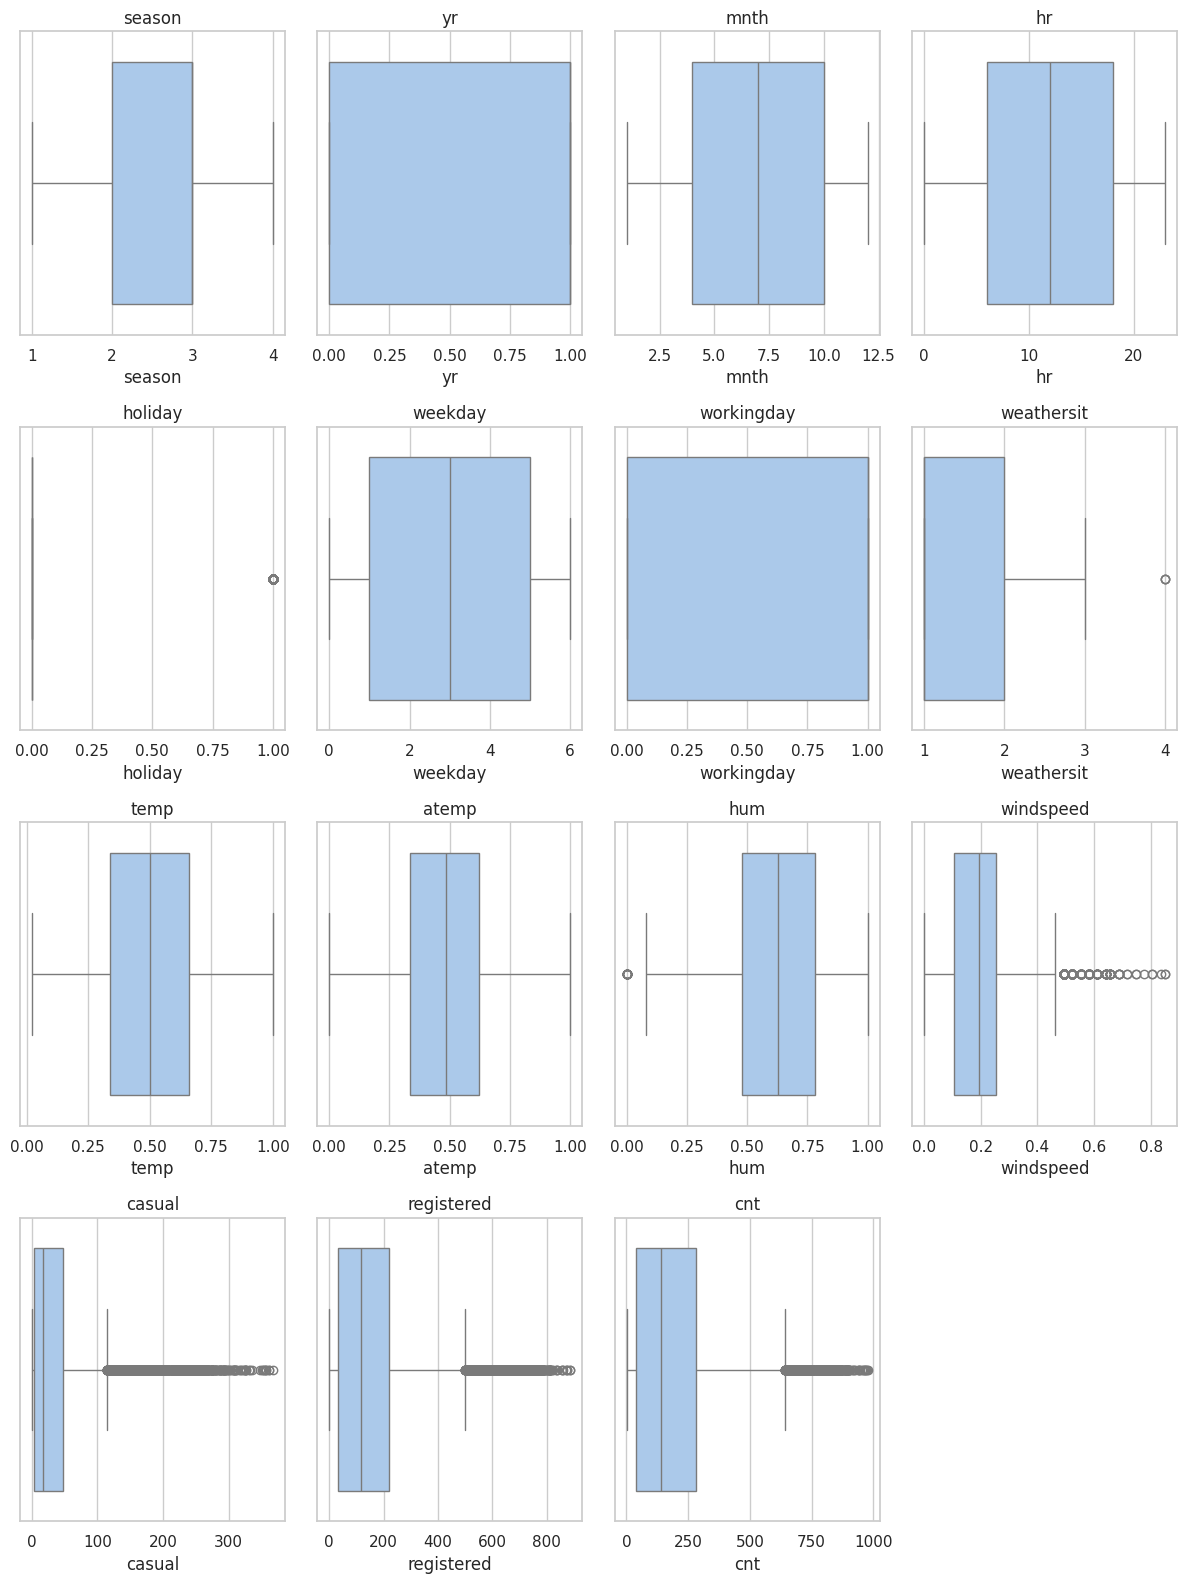

In [8]:
# Calculate the number of rows and columns for the subplots, excluding 'instant' and 'dteday'
num_cols = 4
columns_to_plot = [col for col in df.columns if col not in ['instant', 'dteday']]  # Exclude columns
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# Create subplots with the exact number of axes needed
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4 * num_rows))

# Iterate through selected columns and create boxplots
for i, column in enumerate(columns_to_plot):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Remove any unused axes (empty subplots)
for i in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])  # Flatten the axes array and delete unused ones

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Cleaning Data

In [9]:
# Record index ('instant') are not required
df.drop(["instant"], axis=1, inplace=True)

In [10]:
# Record index ('instant') and 'dteday' are not required
data.drop(['dteday','instant'], axis=1, inplace=True) # Drop 'dteday' and 'instant' column

In [11]:
# change dteday to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

outliers are not drop because they contain important information

✅Data is already clean✅

## Exploratory Data Analysis (EDA)

#### Correlation

<Axes: title={'center': 'Correlation Plot'}>

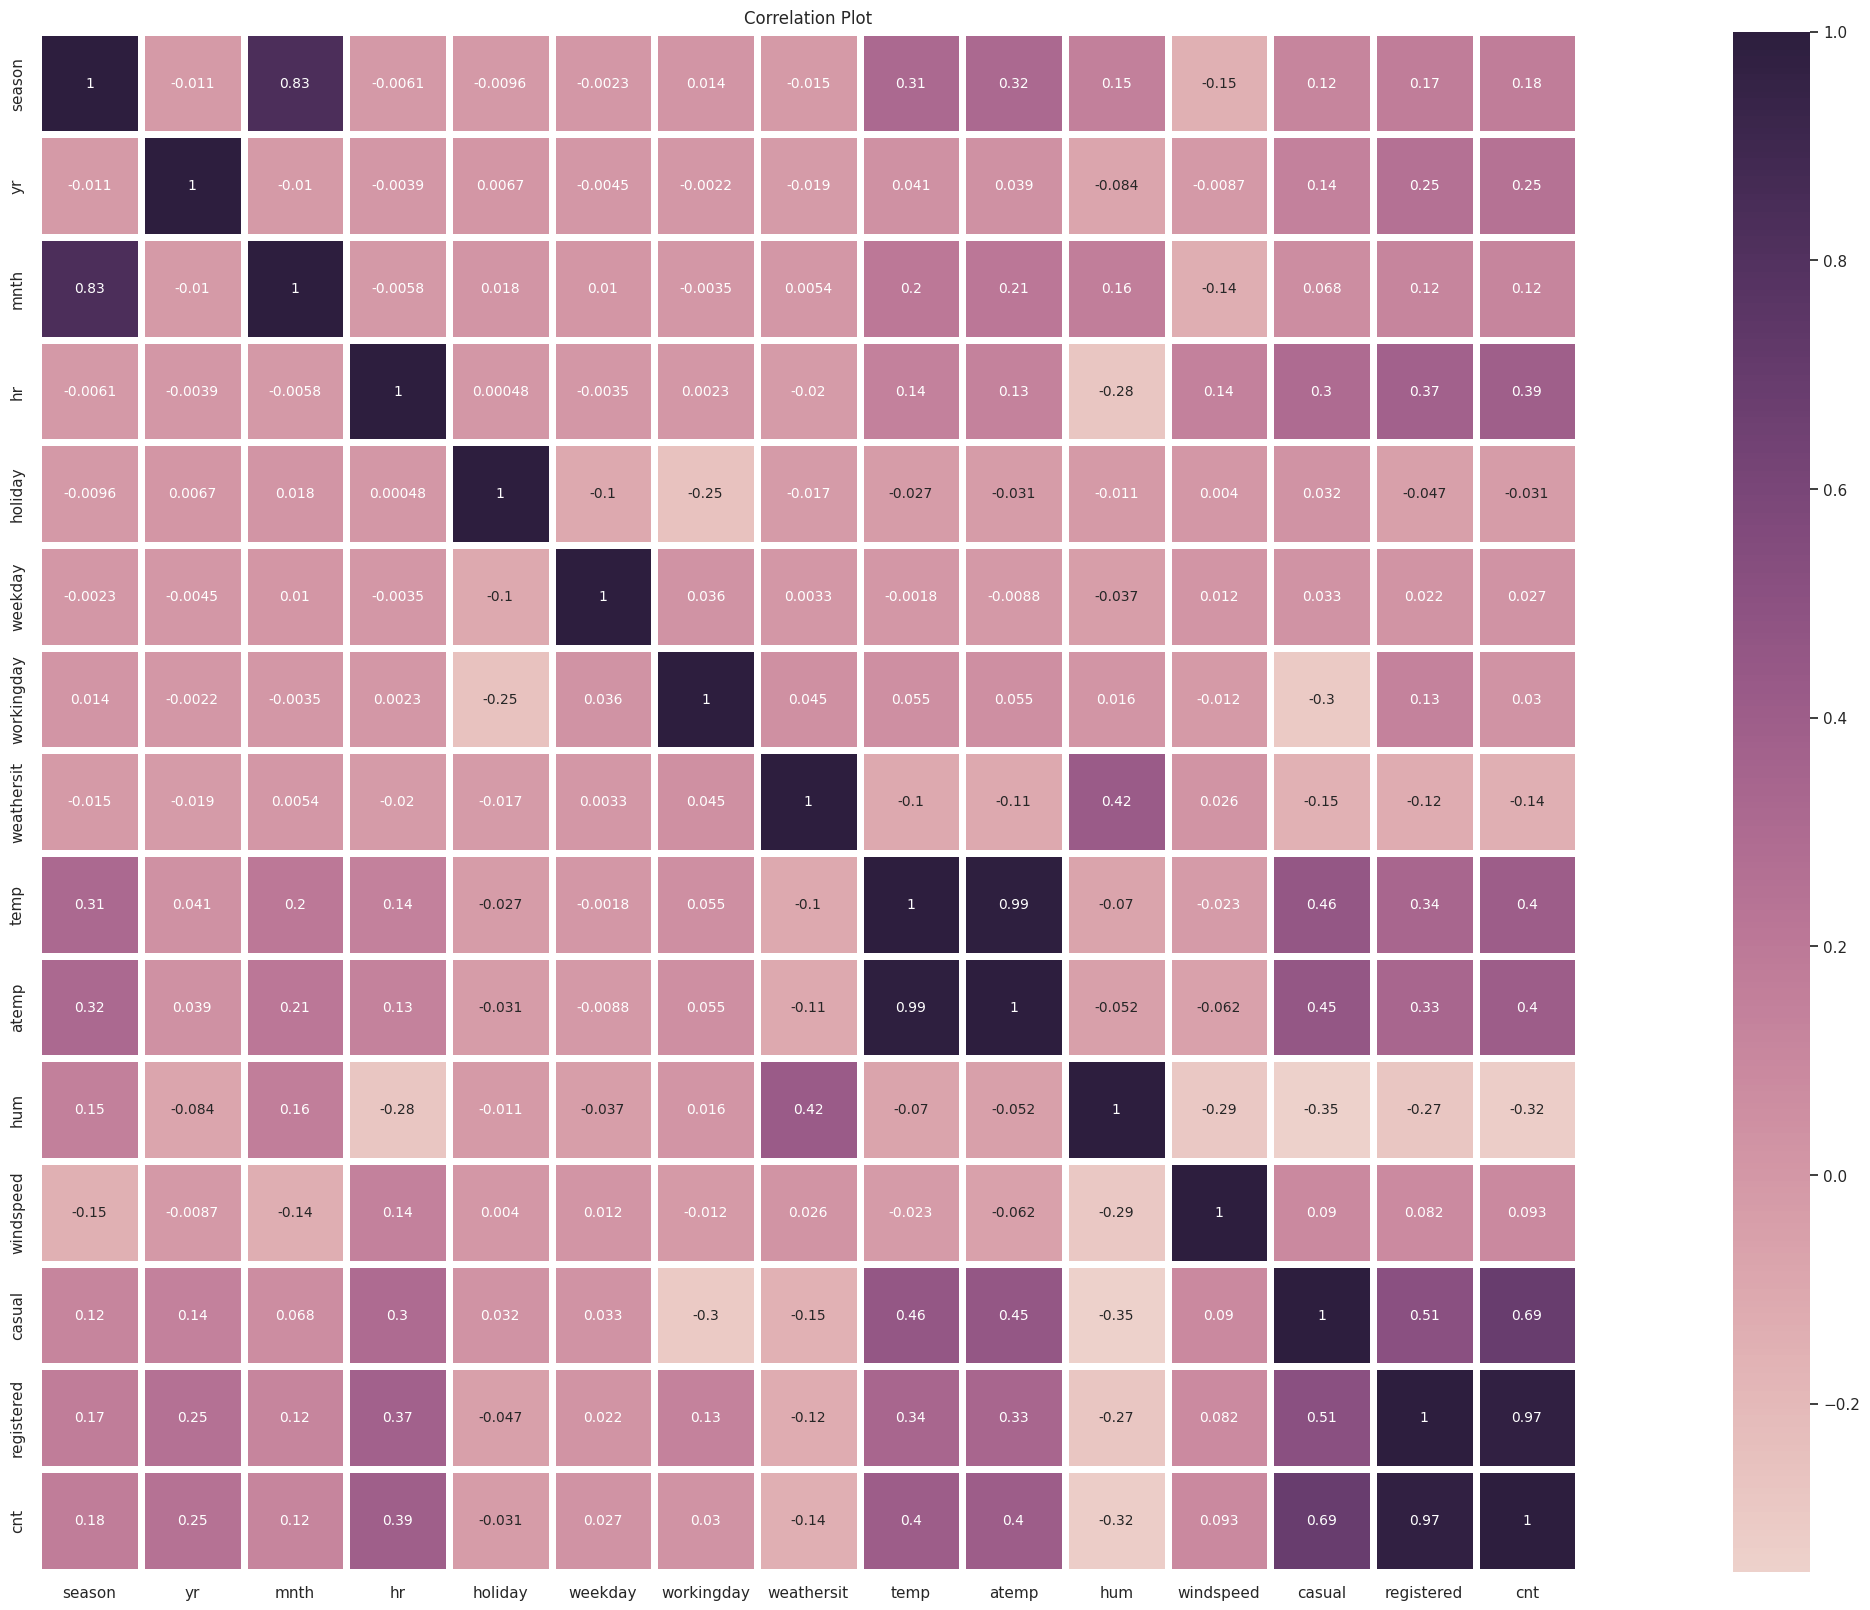

In [12]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(data.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10}, cmap=sns.cubehelix_palette(as_cmap=True))

### Explore dteday

In [13]:
df["dteday"].value_counts().sort_index()

dteday
2011-01-01    24
2011-01-02    23
2011-01-03    22
2011-01-04    23
2011-01-05    23
              ..
2012-12-27    24
2012-12-28    24
2012-12-29    24
2012-12-30    24
2012-12-31    24
Name: count, Length: 731, dtype: int64

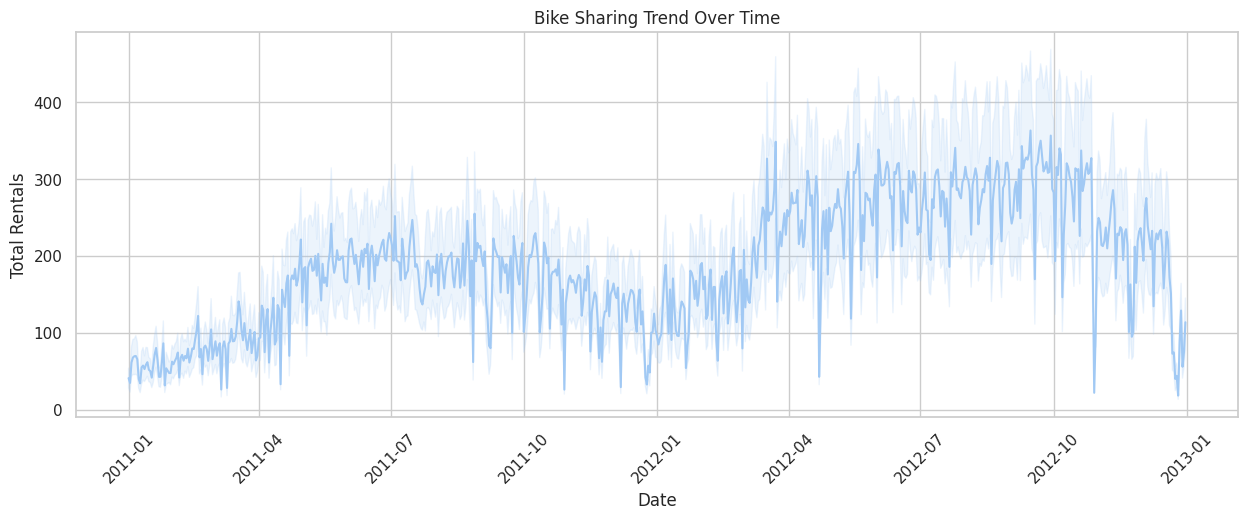

In [14]:
# Lineplot cnt based on dteday
plt.figure(figsize=(15,5))
sns.lineplot(x=df["dteday"].dt.date, y=df["cnt"])
plt.title("Bike Sharing Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.xticks(rotation=45)
plt.show()


### Explore season

In [15]:
df["season"].value_counts()

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

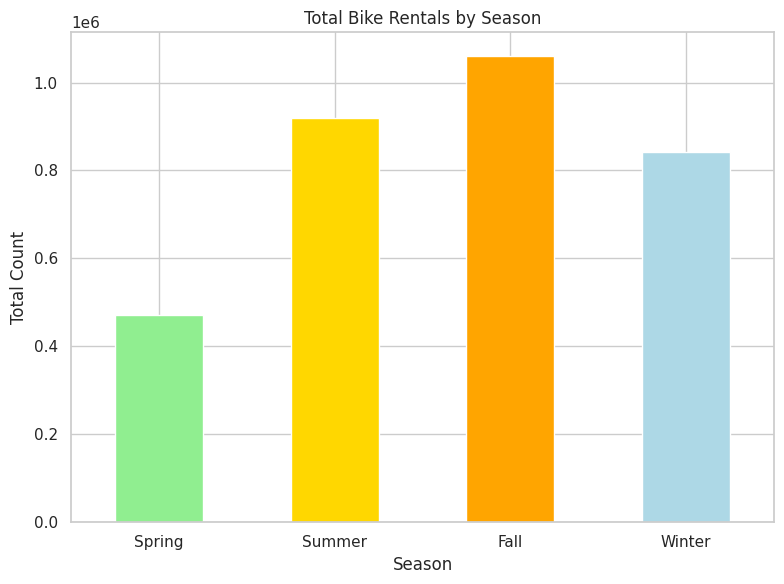

In [16]:
# Group the data by season and calculate the total count for each season
seasonal_counts = df.groupby('season')['cnt'].sum()

# Define a list of colors for each season
colors = ['lightgreen', 'gold', 'orange', 'lightblue']

# Create a bar plot
plt.figure(figsize=(8, 6))
seasonal_counts.plot(kind='bar', color=colors)

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Total Count')
plt.title('Total Bike Rentals by Season')

# Customize x-axis labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)

# Display the plot
plt.tight_layout()
plt.show()


### Explore year

In [17]:
df["yr"].value_counts()

yr
1    8734
0    8645
Name: count, dtype: int64

In [18]:
# Group the data by year and calculate the total count for each year
yearly_counts = df.groupby('yr')['cnt'].sum()
yearly_counts

yr
0    1243103
1    2049576
Name: cnt, dtype: int64

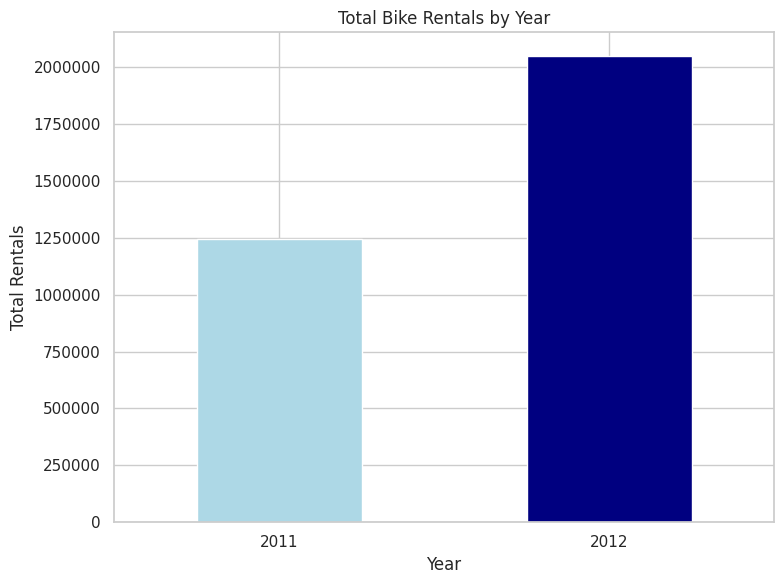

In [19]:
# Create a bar plot
plt.figure(figsize=(8, 6))
yearly_counts.plot(kind='bar', color=['lightblue', 'navy'])

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Year')

# Customize x-axis labels
plt.xticks(ticks=[0, 1], labels=['2011', '2012'], rotation=0)

# Remove scientific notation on y-axis
plt.ticklabel_format(style='plain', axis='y')

# Display the plot
plt.tight_layout()
plt.show()


### Explore month

In [20]:
df["mnth"].value_counts()

mnth
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64

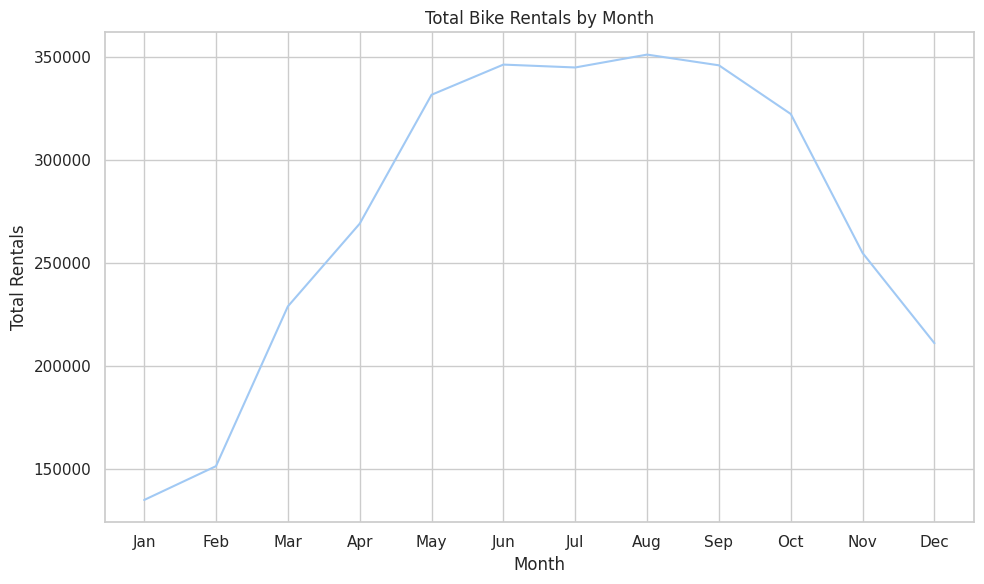

In [21]:
# Group the data by month and calculate the total count for each month
monthly_counts = df.groupby('mnth')['cnt'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Month')

# Customize x-axis labels
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=month_names)

# Display the plot
plt.tight_layout()
plt.show()



In [22]:
# Group the data by year and month, then count occurrences
monthly_counts = df.groupby([df['dteday'].dt.year, df['mnth']])['mnth'].count()

# Print the counts for 2011 and 2012
print("Monthly Counts for 2011:\n", monthly_counts[2011])
print("\nMonthly Counts for 2012:\n", monthly_counts[2012])


Monthly Counts for 2011:
 mnth
1     688
2     649
3     730
4     719
5     744
6     720
7     744
8     731
9     717
10    743
11    719
12    741
Name: mnth, dtype: int64

Monthly Counts for 2012:
 mnth
1     741
2     692
3     743
4     718
5     744
6     720
7     744
8     744
9     720
10    708
11    718
12    742
Name: mnth, dtype: int64


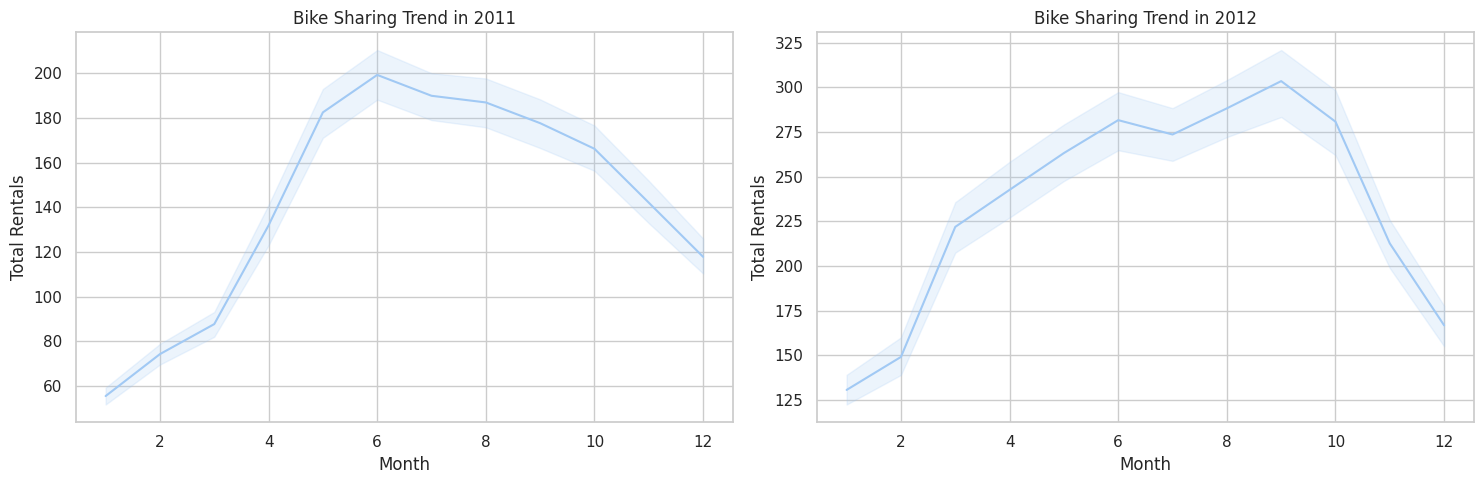

In [23]:
# Filter data for 2011 and 2012
df_2011 = df[df['dteday'].dt.year == 2011]
df_2012 = df[df['dteday'].dt.year == 2012]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for 2011
sns.lineplot(x=df_2011["mnth"], y=df_2011["cnt"], ax=axes[0])
axes[0].set_title("Bike Sharing Trend in 2011")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Total Rentals")

# Plot for 2012
sns.lineplot(x=df_2012["mnth"], y=df_2012["cnt"], ax=axes[1])
axes[1].set_title("Bike Sharing Trend in 2012")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Total Rentals")

plt.tight_layout()
plt.show()


### Explore hour

In [24]:
df['hr'].value_counts().sort_index()

hr
0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: count, dtype: int64

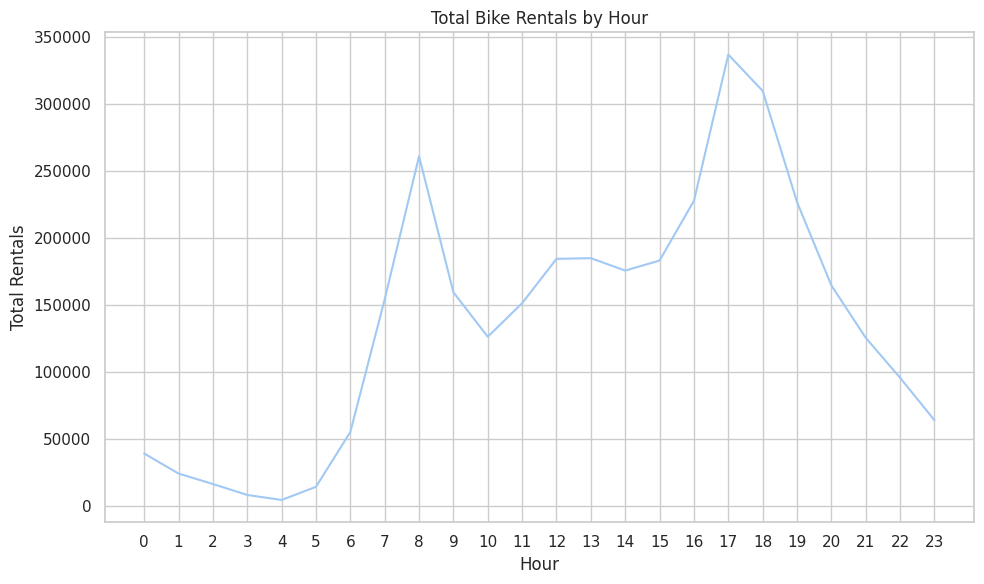

In [25]:
# Group the data by hour and calculate the total count for each hour
hourly_counts = df.groupby('hr')['cnt'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values)

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Hour')

# Customize x-axis ticks to show every hour
plt.xticks(range(24))

# Display the plot
plt.tight_layout()
plt.show()


In [26]:
def time_of_day(hour):
    if hour in [23, 0, 1, 2, 3]:
        return 'midnight'
    elif hour in [4, 5, 6, 7, 8, 9]:
        return 'morning'
    elif hour in [10, 11, 12, 13]:
        return 'afternoon'
    elif hour in [14, 15, 16, 17, 18]:
        return 'evening'
    else:
        return 'night'

df['time'] = df['hr'].apply(time_of_day)

In [27]:
# Group the data by 'time' and calculate the total count for each time period
time_counts = df.groupby('time')['cnt'].sum().sort_index()

# Define the desired order of time periods
time_order = ['morning', 'afternoon', 'evening', 'night', 'midnight']

# Reorder the time_counts Series based on the desired order
time_counts = time_counts.reindex(time_order)


In [28]:
time_counts

time
morning       648431
afternoon     646910
evening      1233181
night         612396
midnight      151761
Name: cnt, dtype: int64

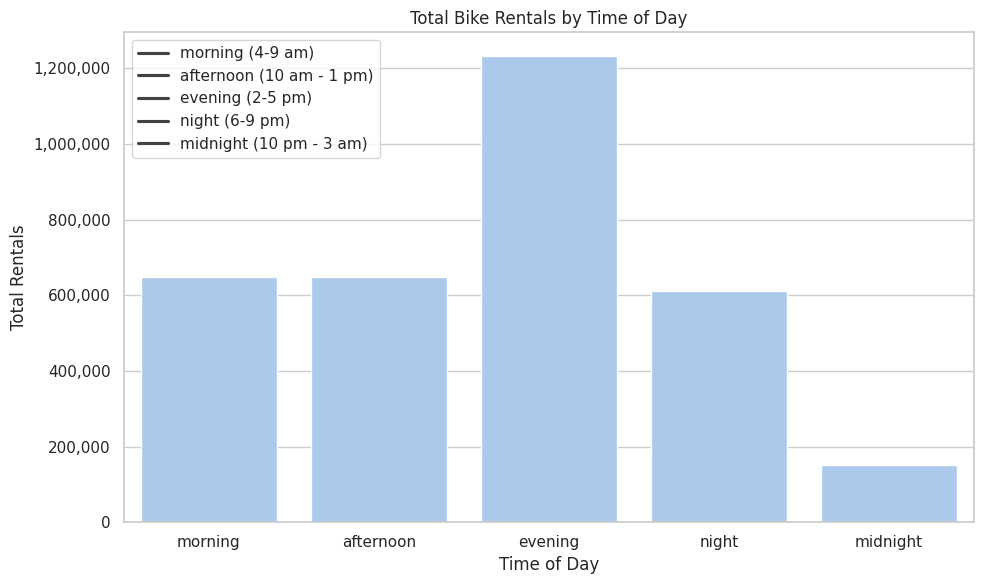

In [29]:
# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=time_counts.index, y=time_counts.values)

# Set labels and title
plt.xlabel('Time of Day')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Time of Day')

# Format y-axis labels to display actual values (remove scientific notation)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Add legend for time periods
legend_labels = ['morning (4-9 am)', 'afternoon (10 am - 1 pm)', 'evening (2-5 pm)', 'night (6-9 pm)', 'midnight (10 pm - 3 am)']
plt.legend(labels=legend_labels, loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


### Explore holiday

In [30]:
df['holiday'].value_counts()

holiday
0    16879
1      500
Name: count, dtype: int64

In [31]:
# Group the data by 'holiday' and calculate the total count for each group
holiday_counts = df.groupby('holiday')['cnt'].sum()
holiday_counts

holiday
0    3214244
1      78435
Name: cnt, dtype: int64

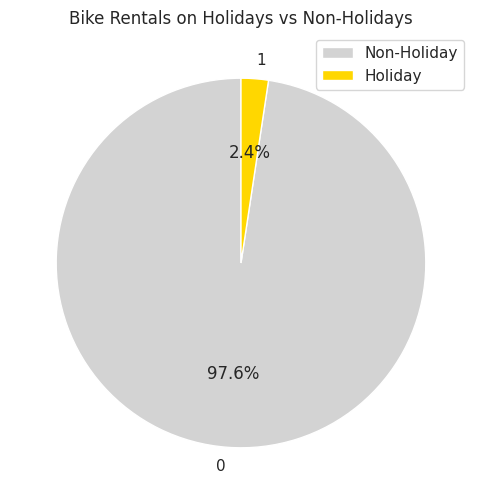

In [32]:
# Define colors for the pie chart
colors = ['lightgrey', 'gold']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(holiday_counts, labels=holiday_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Bike Rentals on Holidays vs Non-Holidays')
plt.legend(['Non-Holiday', 'Holiday'], loc='best')
plt.show()


### Explore weekday

In [33]:
df['weekday'].value_counts().sort_index()
# Sunday=0 Saturday=6

weekday
0    2502
1    2479
2    2453
3    2475
4    2471
5    2487
6    2512
Name: count, dtype: int64

In [34]:
# Group the data by 'weekday' and calculate the total count for each day
weekday_counts = df.groupby('weekday')['cnt'].sum()
weekday_counts

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

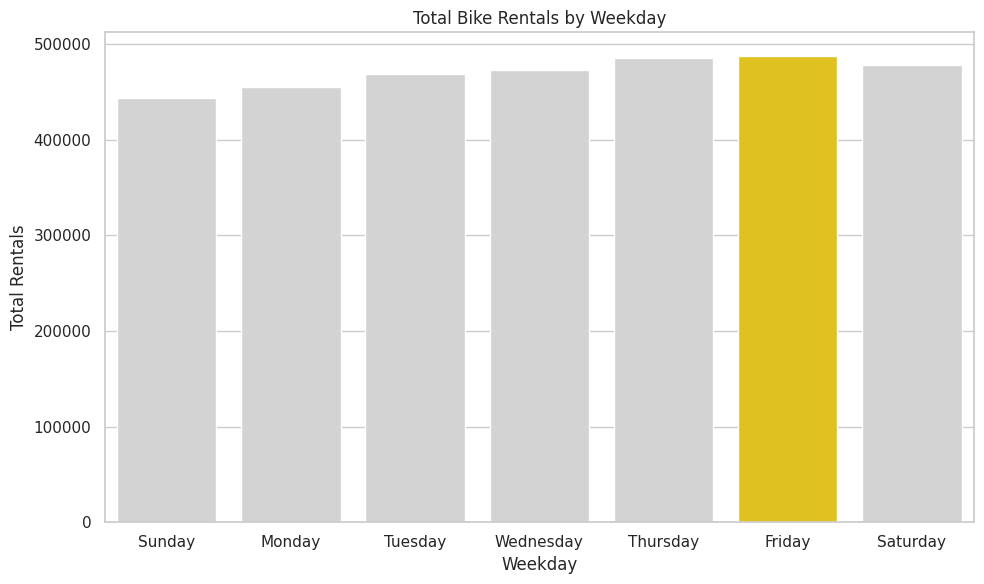

In [35]:
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette=['lightgrey' if i != weekday_counts.idxmax() else 'gold' for i in weekday_counts.index])

# Set labels and title
plt.xlabel('Weekday')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Weekday')

# Customize x-axis labels
weekday_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks=range(7), labels=weekday_labels)

# Display the plot
plt.tight_layout()
plt.show()


### Explore workingday

In [36]:
df['workingday'].value_counts()

workingday
1    11865
0     5514
Name: count, dtype: int64

In [37]:
# Group the data by 'workingday' and calculate the total count for each group
workingday_counts = df.groupby('workingday')['cnt'].sum()
workingday_counts

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64

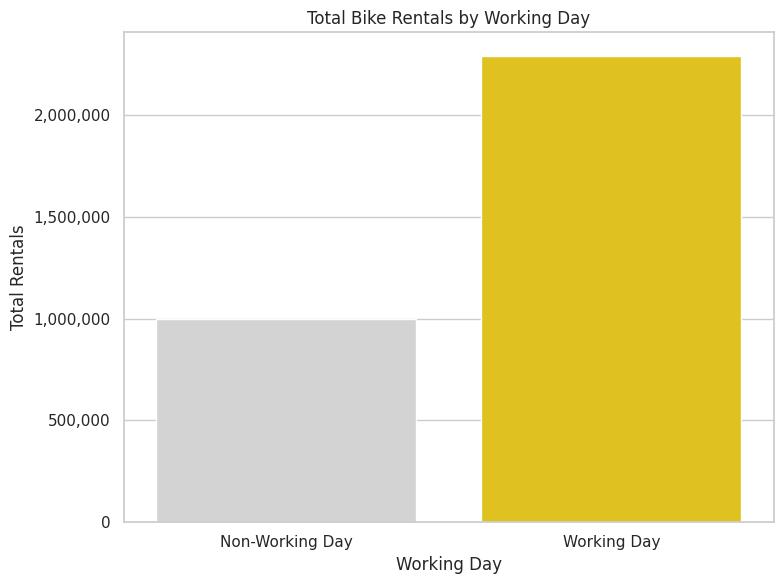

In [38]:
# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=workingday_counts.index, y=workingday_counts.values, palette=['lightgrey', 'gold'])

# Set labels and title
plt.xlabel('Working Day')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Working Day')

# Customize x-axis labels
plt.xticks(ticks=[0, 1], labels=['Non-Working Day', 'Working Day'])

# Format y-axis labels to display actual values (remove scientific notation)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Display the plot
plt.tight_layout()
plt.show()


### Explore weathersit

In [39]:
df['weathersit'].value_counts()

"""
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
"""

'\n1: Clear, Few clouds, Partly cloudy, Partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog\n'

In [40]:
# Group the data by 'weathersit' and calculate the total count for each group
weathersit_counts = df.groupby('weathersit')['cnt'].sum()
weathersit_counts

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

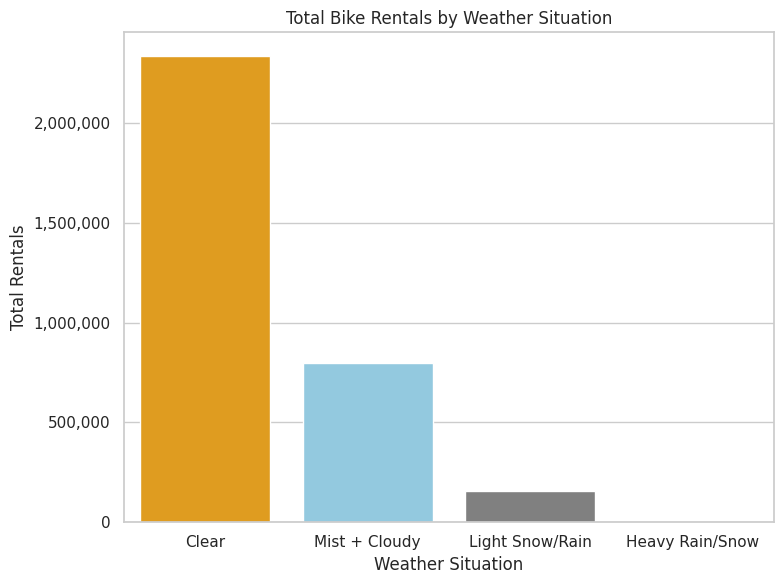

In [41]:
# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=weathersit_counts.index, y=weathersit_counts.values, palette=['orange', 'skyblue', 'grey', 'red'])

# Set labels and title
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Weather Situation')

# Customize x-axis labels
weather_labels = ['Clear', 'Mist + Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow']
plt.xticks(ticks=range(4), labels=weather_labels)

# Format y-axis labels to display actual values (remove scientific notation)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Display the plot
plt.tight_layout()
plt.show()


### Explore temp

In [42]:
df['temp'].value_counts()

temp
0.62    726
0.66    693
0.64    692
0.70    690
0.60    675
0.36    671
0.34    645
0.30    641
0.40    614
0.32    611
0.56    579
0.72    570
0.54    569
0.46    559
0.26    559
0.52    556
0.42    548
0.50    531
0.24    522
0.74    516
0.44    507
0.22    421
0.76    396
0.38    372
0.20    354
0.68    349
0.80    325
0.58    305
0.28    301
0.48    288
0.16    230
0.82    213
0.78    169
0.18    155
0.14    138
0.84    138
0.86    131
0.90     90
0.12     76
0.88     53
0.10     51
0.92     49
0.94     17
0.08     17
0.02     17
0.04     16
0.06     16
0.96     16
0.98      1
1.00      1
Name: count, dtype: int64

In [43]:
df['temp'].describe()

count    17379.000000
mean         0.496987
std          0.192556
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

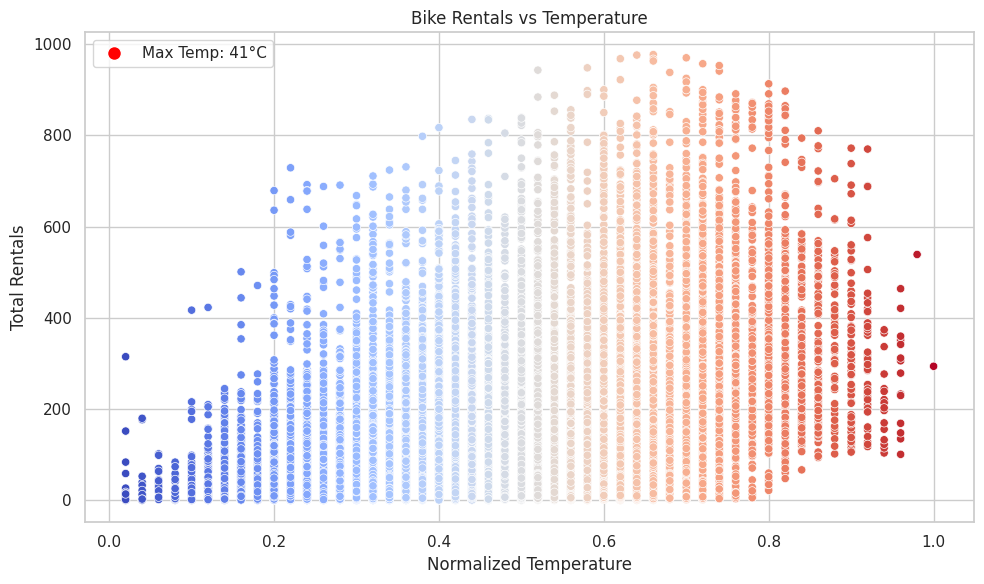

In [44]:
# Scatter plot with color gradient and legend
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df, hue='temp', palette='coolwarm', legend='full')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')
plt.title('Bike Rentals vs Temperature')

# Custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Max Temp: 41°C', markerfacecolor='red', markersize=10)]
plt.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()


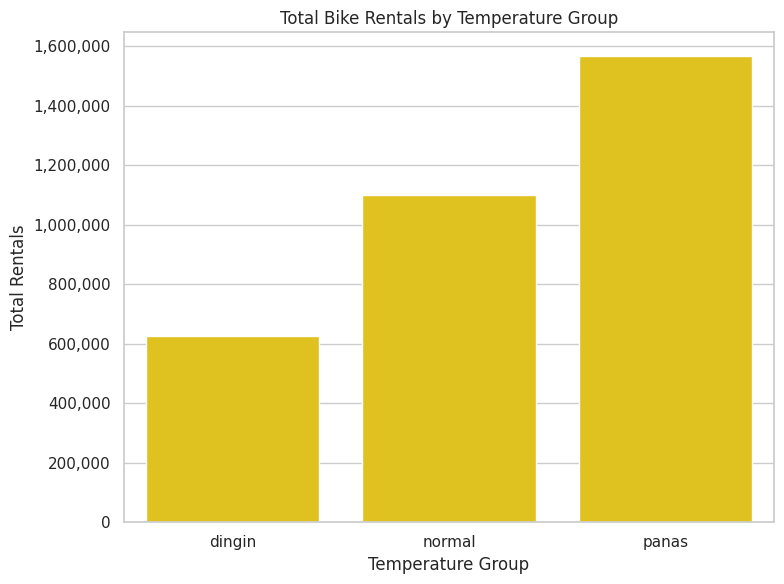

In [45]:
def temperature_group(temp):
  if temp >= 0.4 and temp <= 0.6:
    return 'normal'
  elif temp > 0.6:
    return 'panas'
  else:
    return 'dingin'

df['temp_group'] = df['temp'].apply(temperature_group)

# Group the data by 'temp_group' and calculate the total count for each group
temp_group_counts = df.groupby('temp_group')['cnt'].sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=temp_group_counts.index, y=temp_group_counts.values, color= "gold")

# Set labels and title
plt.xlabel('Temperature Group')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Temperature Group')

# Format y-axis labels to display actual values (remove scientific notation)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Display the plot
plt.tight_layout()
plt.show()


### Explore atemp

In [46]:
df['atemp'].value_counts()

atemp
0.6212    988
0.5152    618
0.4091    614
0.3333    600
0.6667    593
         ... 
0.0152      4
0.0000      2
0.9848      2
0.9545      1
1.0000      1
Name: count, Length: 65, dtype: int64

In [47]:
df['atemp'].describe()

count    17379.000000
mean         0.475775
std          0.171850
min          0.000000
25%          0.333300
50%          0.484800
75%          0.621200
max          1.000000
Name: atemp, dtype: float64

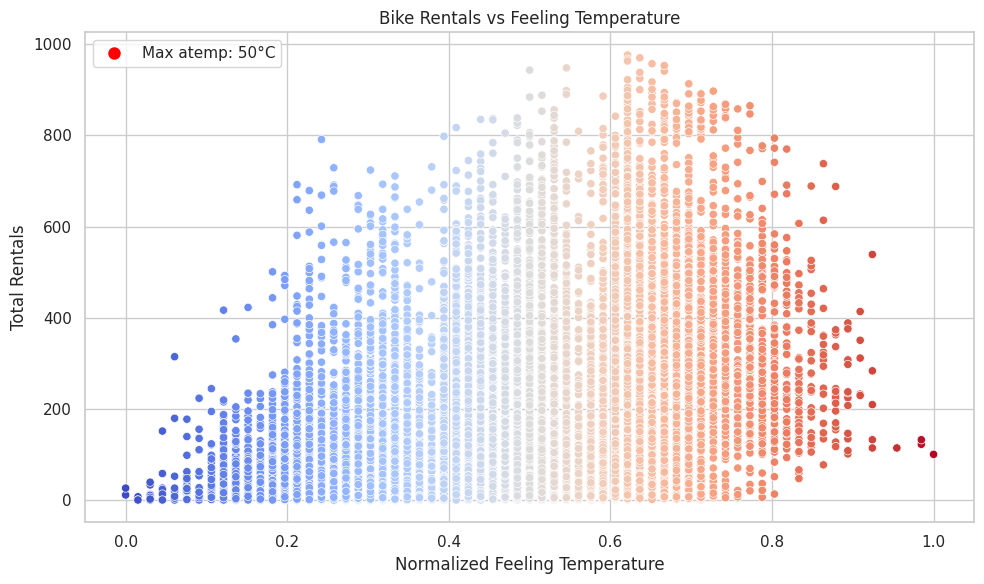

In [48]:
# Scatter plot with color gradient and legend
plt.figure(figsize=(10, 6))
sns.scatterplot(x='atemp', y='cnt', data=df, hue='atemp', palette='coolwarm', legend='full')
plt.xlabel('Normalized Feeling Temperature')
plt.ylabel('Total Rentals')
plt.title('Bike Rentals vs Feeling Temperature')

# Custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Max atemp: 50°C', markerfacecolor='red', markersize=10)]
plt.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()


### Explore hum

In [49]:
df['hum'].value_counts()

hum
0.88    657
0.83    630
0.94    560
0.87    488
0.70    430
       ... 
0.12      1
0.08      1
0.10      1
0.97      1
0.91      1
Name: count, Length: 89, dtype: int64

In [50]:
df['hum'].describe()

count    17379.000000
mean         0.627229
std          0.192930
min          0.000000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: hum, dtype: float64

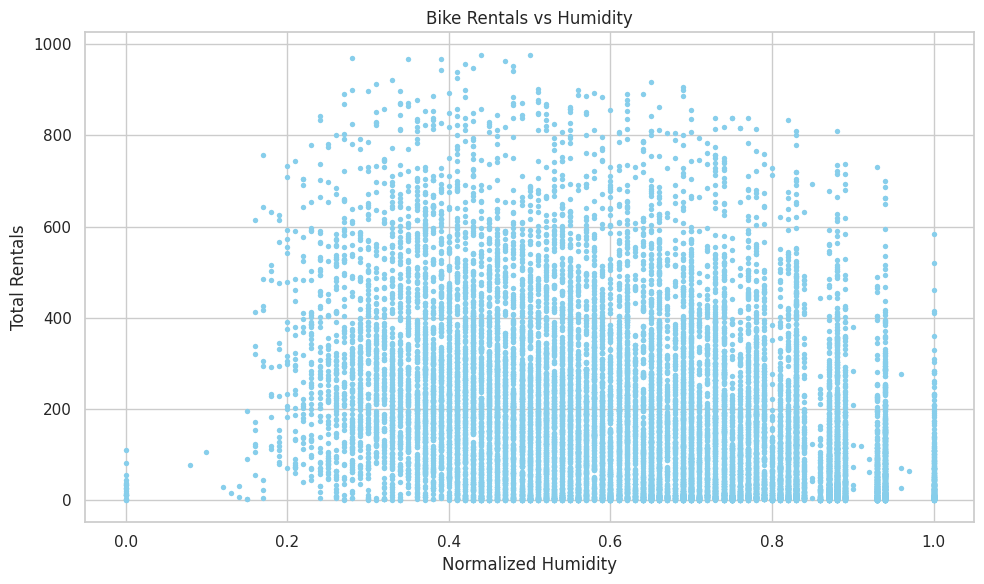

In [51]:
# Scatter plot with consistent color and no gradient
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=df, color='skyblue', s=15, linewidth=0)  # s: point size, linewidth: outline thickness (0 for no outline)
plt.xlabel('Normalized Humidity')
plt.ylabel('Total Rentals')
plt.title('Bike Rentals vs Humidity')

plt.tight_layout()
plt.show()


### Explore windspeed

In [52]:
df['windspeed'].value_counts()

windspeed
0.0000    2180
0.1343    1738
0.1642    1695
0.1940    1657
0.1045    1617
0.2239    1513
0.0896    1425
0.2537    1295
0.2836    1048
0.2985     808
0.3284     602
0.3582     460
0.3881     381
0.4179     296
0.4478     176
0.4627     146
0.4925     112
0.5224      84
0.5821      44
0.5522      39
0.6119      23
0.6418      14
0.6567      11
0.6866       5
0.7463       2
0.8060       2
0.8507       2
0.7164       2
0.7761       1
0.8358       1
Name: count, dtype: int64

In [53]:
df['windspeed'].describe()

count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

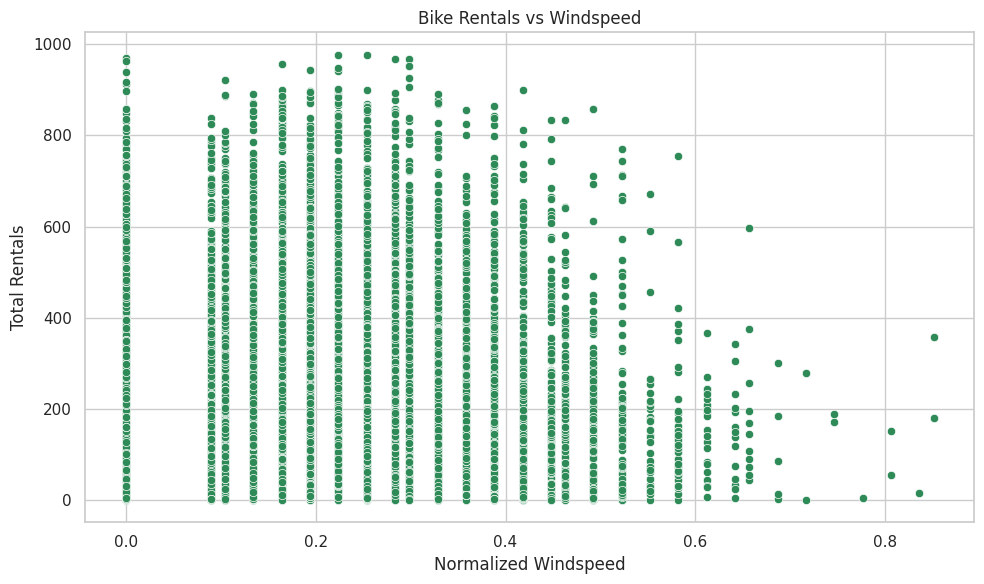

In [54]:
# Scatter plot with consistent color and no gradient
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=df, color='seagreen')
plt.xlabel('Normalized Windspeed')
plt.ylabel('Total Rentals')
plt.title('Bike Rentals vs Windspeed')

plt.tight_layout()
plt.show()


### Explore registered

In [55]:
df['registered'].describe()

count    17379.000000
mean       153.786869
std        151.357286
min          0.000000
25%         34.000000
50%        115.000000
75%        220.000000
max        886.000000
Name: registered, dtype: float64

### Explore casual

In [56]:
df['casual'].describe()

count    17379.000000
mean        35.676218
std         49.305030
min          0.000000
25%          4.000000
50%         17.000000
75%         48.000000
max        367.000000
Name: casual, dtype: float64

### Explore cnt

In [57]:
df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan waktu favorit pelanggan untuk bersepeda?


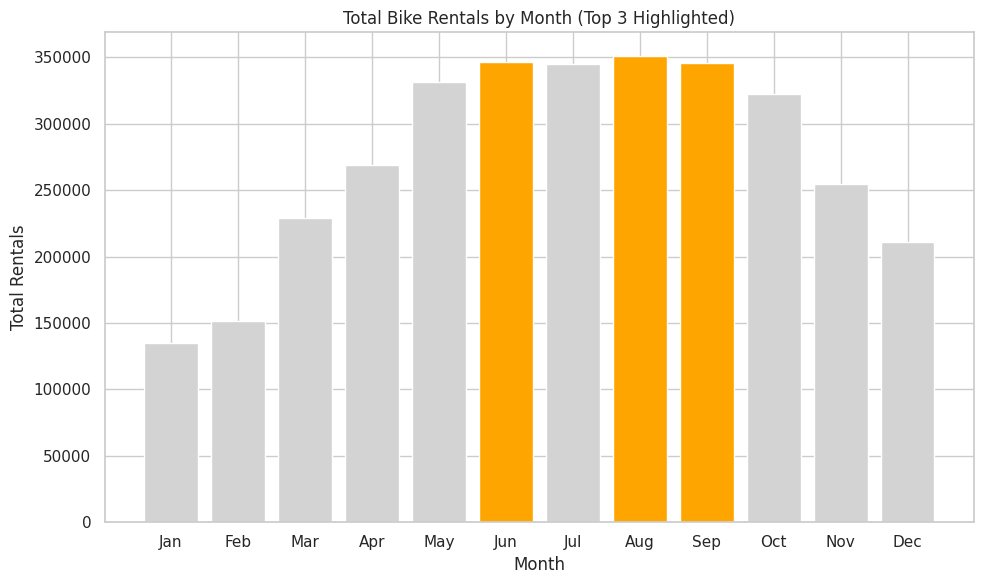

In [58]:
# Group the data by month and calculate the total count for each month
monthly_counts = df.groupby('mnth')['cnt'].sum().sort_values(ascending=False)

# Get the top 3 months
top_3_months = monthly_counts.index[:3]

# Create a list of colors for the bars
colors = ['orange' if month in top_3_months else 'lightgrey' for month in monthly_counts.index]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values, color=colors)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Month (Top 3 Highlighted)')

# Customize x-axis labels
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=month_names)

# Display the plot
plt.tight_layout()
plt.show()


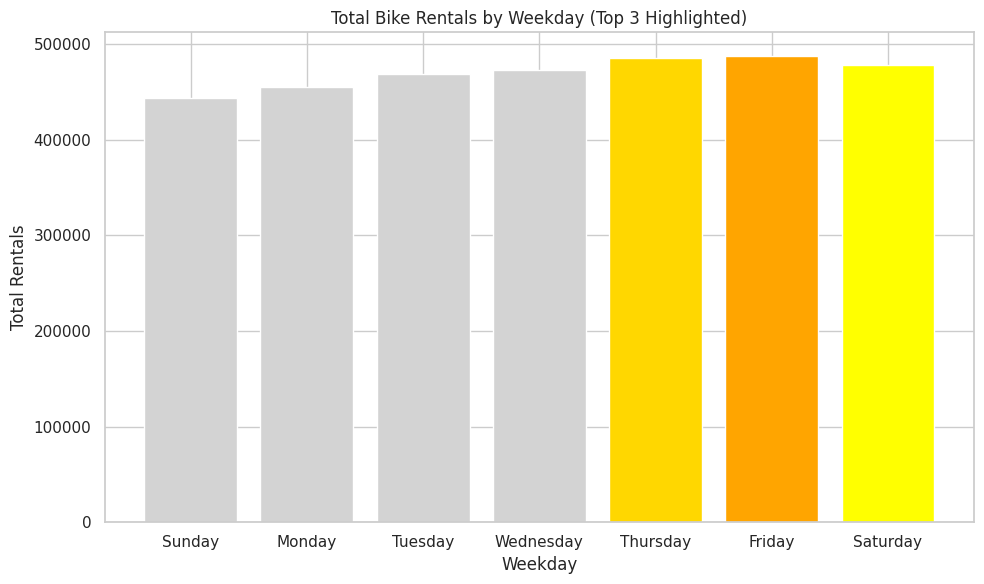

In [59]:
# Group the data by weekday and calculate the total count for each day
weekday_counts = df.groupby('weekday')['cnt'].sum().sort_values(ascending=False)

# Get the top 3 weekdays
top_3_weekdays = weekday_counts.index[:3]

# Create a list of colors for the bars
colors = ['orange' if day == top_3_weekdays[0] else
          'gold' if day == top_3_weekdays[1] else
          'yellow' if day == top_3_weekdays[2] else
          'lightgrey' for day in weekday_counts.index]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(weekday_counts.index, weekday_counts.values, color=colors)

# Set labels and title
plt.xlabel('Weekday')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Weekday (Top 3 Highlighted)')

# Customize x-axis labels
weekday_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks=range(7), labels=weekday_labels)

# Display the plot
plt.tight_layout()
plt.show()



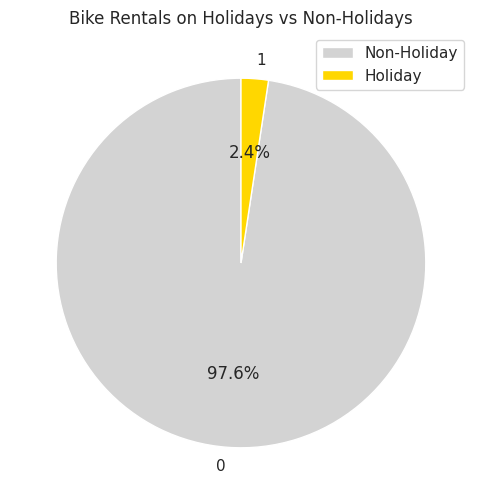

In [60]:
# Define colors for the pie chart
colors = ['lightgrey', 'gold']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(holiday_counts, labels=holiday_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Bike Rentals on Holidays vs Non-Holidays')
plt.legend(['Non-Holiday', 'Holiday'], loc='best')
plt.show()


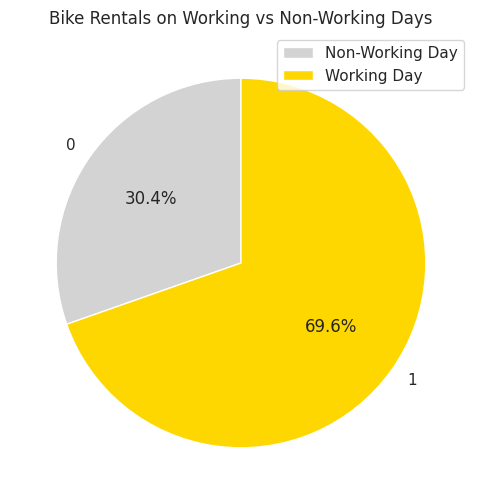

In [61]:
# Group the data by 'workingday' and calculate the total count for each group
workingday_counts = df.groupby('workingday')['cnt'].sum()

# Define colors for the pie chart
colors = ['lightgrey', 'gold']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(workingday_counts, labels=workingday_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Bike Rentals on Working vs Non-Working Days')
plt.legend(['Non-Working Day', 'Working Day'], loc='best')
plt.show()


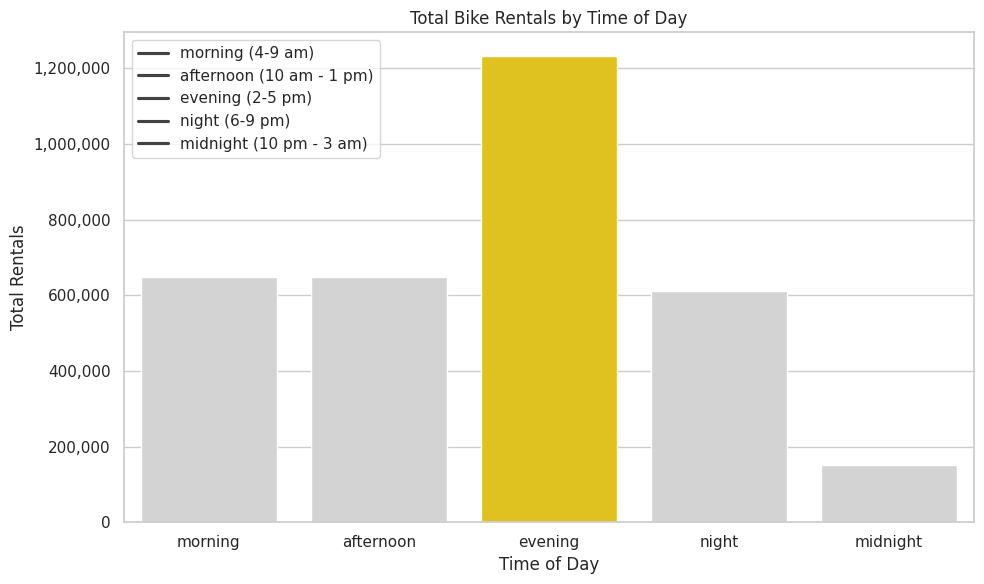

In [62]:
# Group the data by 'time' and calculate the total count for each time period
time_counts = df.groupby('time')['cnt'].sum()

# Find the time period with the highest count
max_time = time_counts.idxmax()

# Define the desired order of time periods
time_order = ['morning', 'afternoon', 'evening', 'night', 'midnight']

# Reorder the time_counts Series based on the desired order
time_counts = time_counts.reindex(time_order)

# Create a list of colors for the bars
colors = ['gold' if time == max_time else 'lightgrey' for time in time_order]

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=time_counts.index, y=time_counts.values, palette=colors)

# Set labels and title
plt.xlabel('Time of Day')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Time of Day')

# Format y-axis labels to display actual values (remove scientific notation)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Add legend for time periods
legend_labels = ['morning (4-9 am)', 'afternoon (10 am - 1 pm)', 'evening (2-5 pm)', 'night (6-9 pm)', 'midnight (10 pm - 3 am)']
plt.legend(labels=legend_labels, loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana perbedaan perilaku pelanggan (casual vs registered users)?

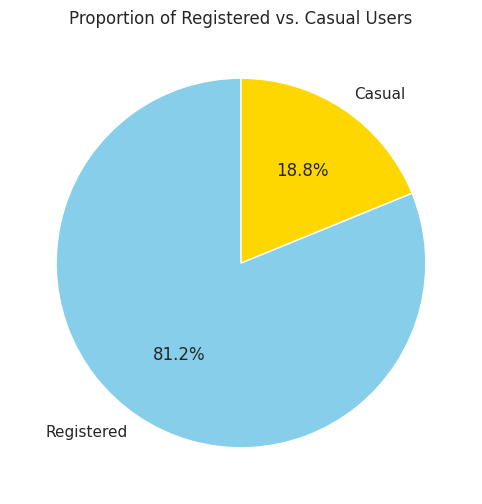

In [63]:
# Count the number of registered and casual users
user_counts = df[['registered', 'casual']].sum()

# Create a pie chart to visualize the proportion of registered vs. casual users
plt.figure(figsize=(8, 6))
plt.pie(user_counts, labels=['Registered', 'Casual'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'gold'])
plt.title('Proportion of Registered vs. Casual Users')
plt.show()


In [64]:
# Group the data by season and user type, then sum the counts
seasonal_user_counts = df.groupby('season')[['registered', 'casual']].sum()
seasonal_user_counts


,registered,casual
season,,
1,410726,60622
2,715067,203522
3,835038,226091
4,711831,129782


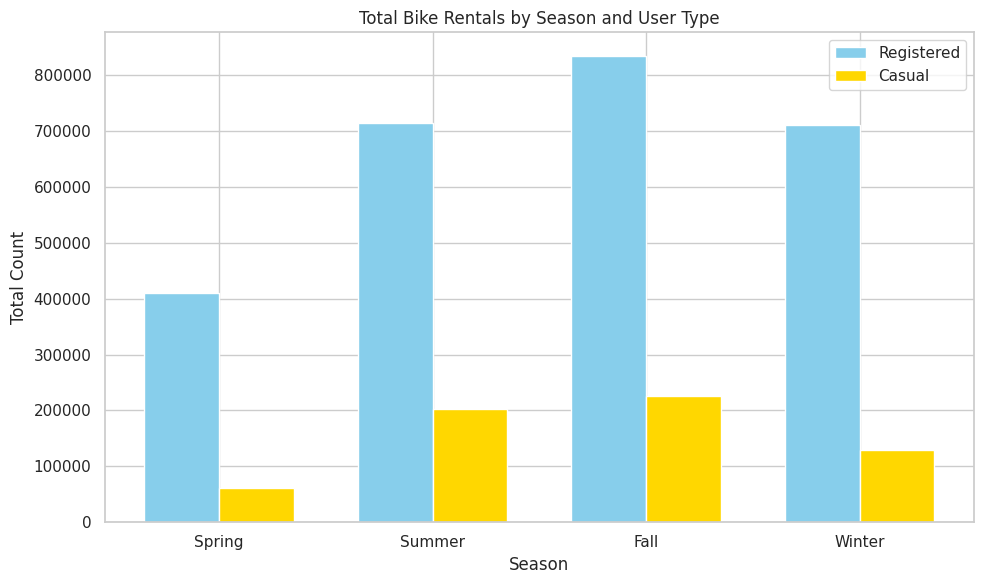

In [65]:
# Set the width of each bar
bar_width = 0.35

# Create an array of indices for the bars
index = np.arange(len(seasonal_user_counts.index))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(index, seasonal_user_counts['registered'], width=bar_width, label='Registered', color='skyblue')
plt.bar(index + bar_width, seasonal_user_counts['casual'], width=bar_width, label='Casual', color='gold')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Total Count')
plt.title('Total Bike Rentals by Season and User Type')

# Customize x-axis labels
plt.xticks(index + bar_width / 2, ['Spring', 'Summer', 'Fall', 'Winter'])

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


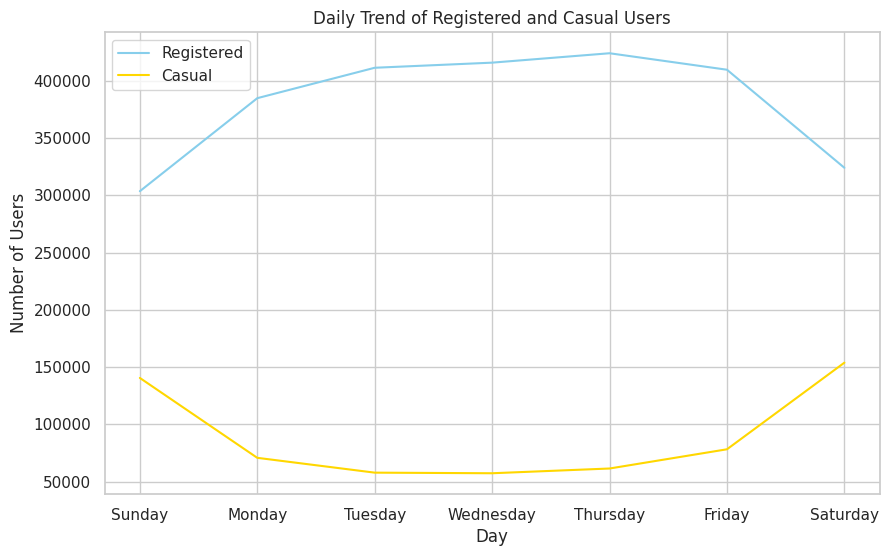

In [66]:
# Group by 'day' and sum the 'registered' and 'casual' users for each day
daily_users = df.groupby('weekday')[['registered', 'casual']].sum().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday', y='registered', data=daily_users, color='skyblue', label='Registered')
sns.lineplot(x='weekday', y='casual', data=daily_users, color='gold', label='Casual')
plt.xlabel('Day')
plt.ylabel('Number of Users')
plt.title('Daily Trend of Registered and Casual Users')
plt.xticks(range(7), ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.legend()
plt.grid(True)
plt.show()


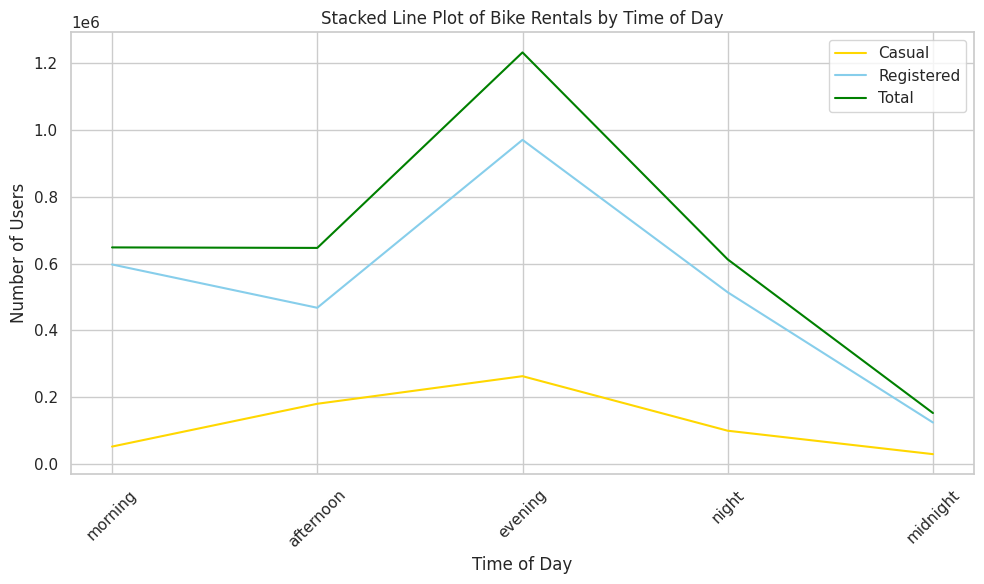

In [67]:
# Group the data by 'time' and calculate the sum of 'casual', 'registered', and 'cnt' for each time period
time_counts = df.groupby('time')[['casual', 'registered', 'cnt']].sum().reset_index()

# Define the desired order of time periods
time_order = ['morning', 'afternoon', 'evening', 'night', 'midnight']

# Reorder the time_counts DataFrame based on the desired order
time_counts['time'] = pd.Categorical(time_counts['time'], categories=time_order, ordered=True)
time_counts = time_counts.sort_values('time')

# Create a stacked line plot
plt.figure(figsize=(10, 6))
plt.plot(time_counts['time'], time_counts['casual'], label='Casual', color='gold')
plt.plot(time_counts['time'], time_counts['registered'], label='Registered', color='skyblue')
plt.plot(time_counts['time'], time_counts['cnt'], label='Total', color='green')
plt.xlabel('Time of Day')
plt.ylabel('Number of Users')
plt.title('Stacked Line Plot of Bike Rentals by Time of Day')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()
plt.show()


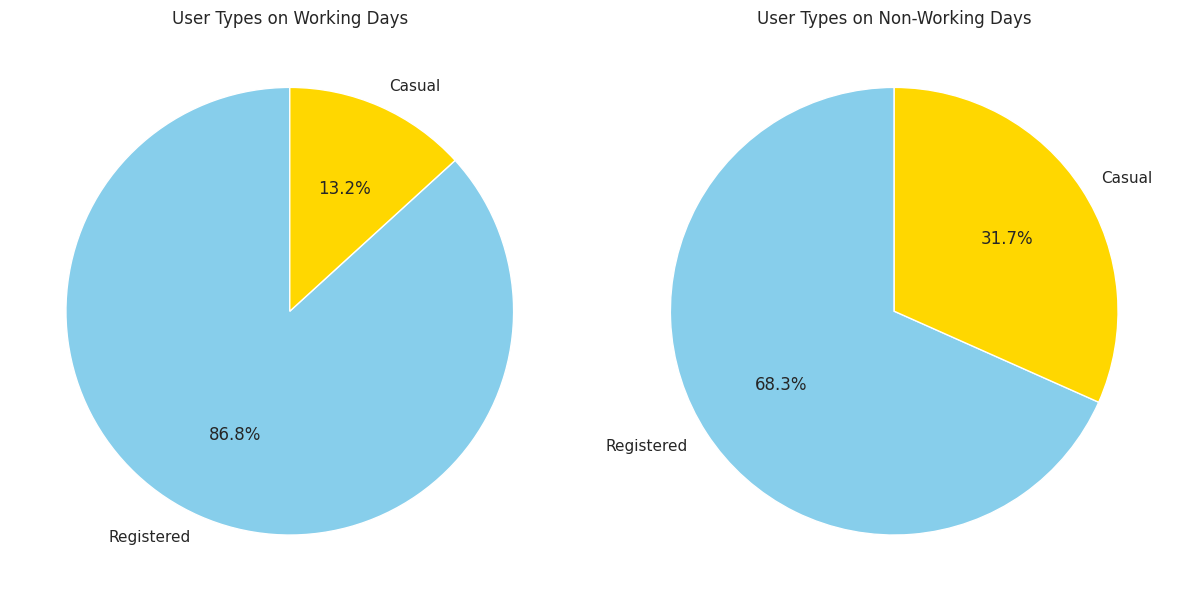

In [68]:
# Group the data by 'workingday' and sum the 'registered' and 'casual' users
workingday_users = df.groupby('workingday')[['registered', 'casual']].sum()

# Create a pie chart for each working day status
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for working days (workingday == 1)
axes[0].pie(workingday_users.loc[1], labels=['Registered', 'Casual'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'gold'])
axes[0].set_title('User Types on Working Days')

# Pie chart for non-working days (workingday == 0)
axes[1].pie(workingday_users.loc[0], labels=['Registered', 'Casual'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'gold'])
axes[1].set_title('User Types on Non-Working Days')

plt.tight_layout()
plt.show()


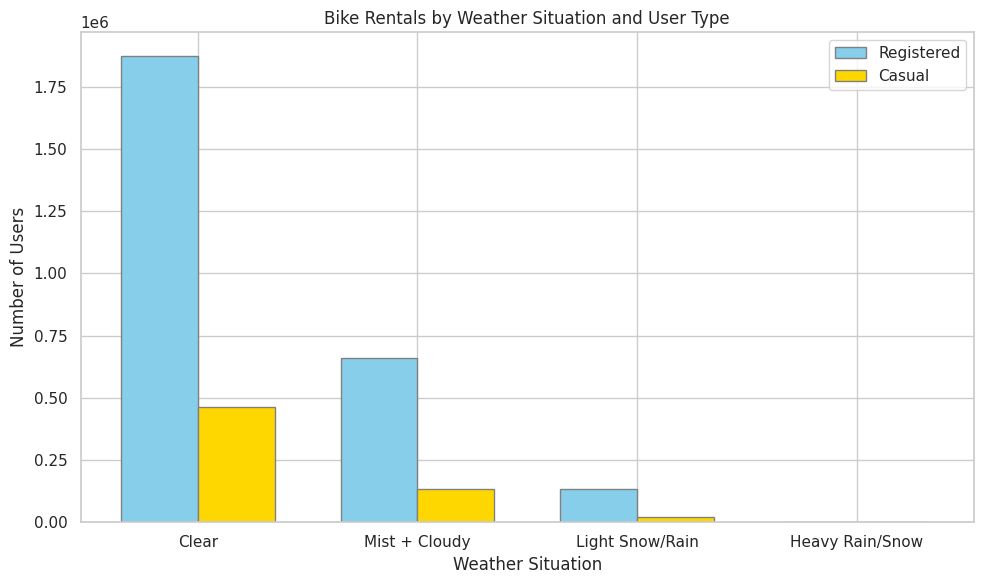

In [69]:
# Group the data by 'weathersit' and sum the 'registered' and 'casual' users
weather_users = df.groupby('weathersit')[['registered', 'casual']].sum()

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(weather_users))
r2 = [x + bar_width for x in r1]

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, weather_users['registered'], color='skyblue', width=bar_width, edgecolor='grey', label='Registered')
plt.bar(r2, weather_users['casual'], color='gold', width=bar_width, edgecolor='grey', label='Casual')

# Set labels and title
plt.xlabel('Weather Situation')
plt.ylabel('Number of Users')
plt.title('Bike Rentals by Weather Situation and User Type')

# Customize x-axis labels
weather_labels = ['Clear', 'Mist + Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow']
plt.xticks([r + bar_width/2 for r in range(len(weather_users))], weather_labels)

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


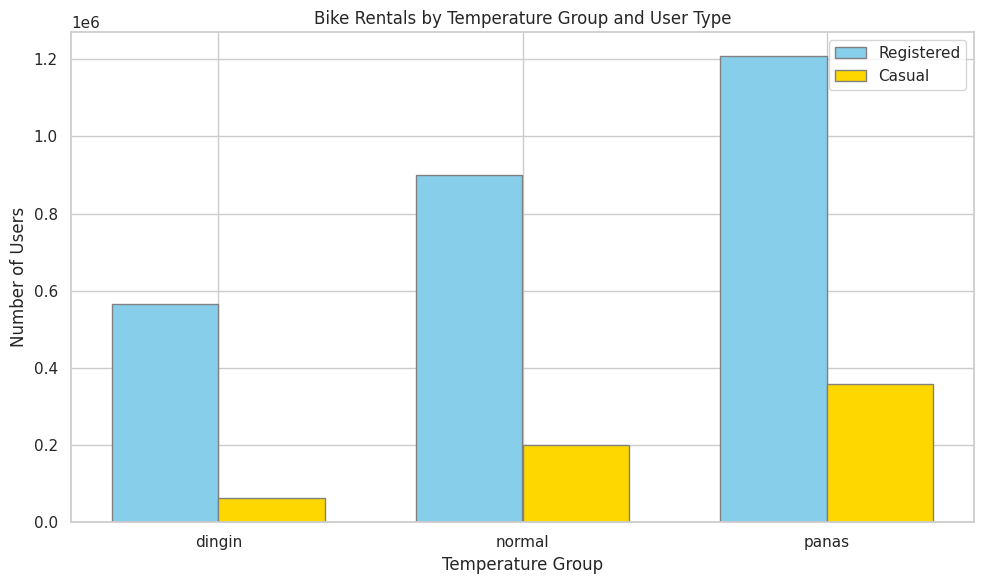

In [70]:
# Group the data by 'temp_group' and sum the 'registered' and 'casual' users
temp_group_users = df.groupby('temp_group')[['registered', 'casual']].sum()

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(temp_group_users))
r2 = [x + bar_width for x in r1]

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, temp_group_users['registered'], color='skyblue', width=bar_width, edgecolor='grey', label='Registered')
plt.bar(r2, temp_group_users['casual'], color='gold', width=bar_width, edgecolor='grey', label='Casual')

# Set labels and title
plt.xlabel('Temperature Group')
plt.ylabel('Number of Users')
plt.title('Bike Rentals by Temperature Group and User Type')

# Customize x-axis labels
plt.xticks([r + bar_width/2 for r in range(len(temp_group_users))], temp_group_users.index)

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


### Pertanyaan 3: Korelasi faktor lingkungan cuaca dan pelanggan?


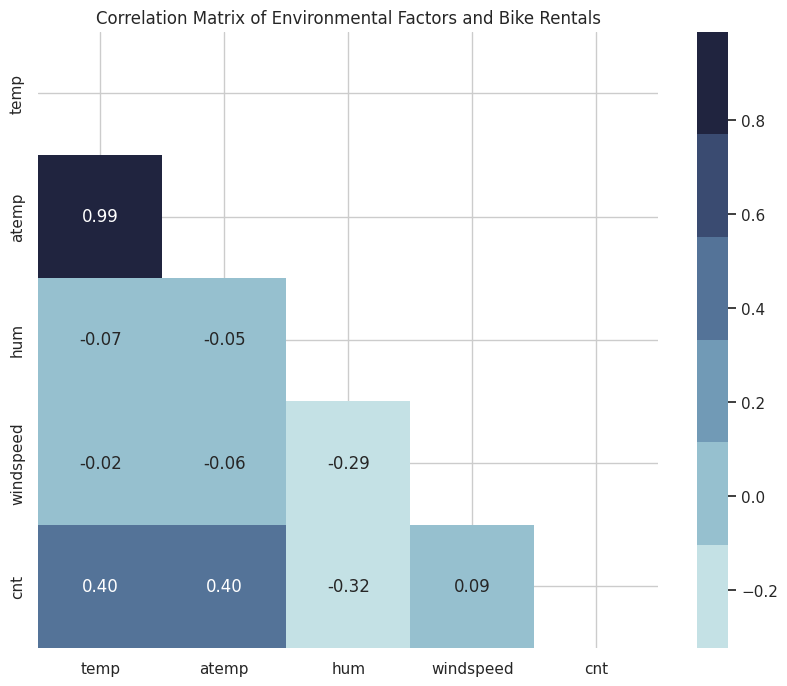

In [71]:
# Calculate the correlation matrix
correlation_matrix = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(rot=-.2), fmt=".2f", mask=mask)


plt.title('Correlation Matrix of Environmental Factors and Bike Rentals')
plt.show()


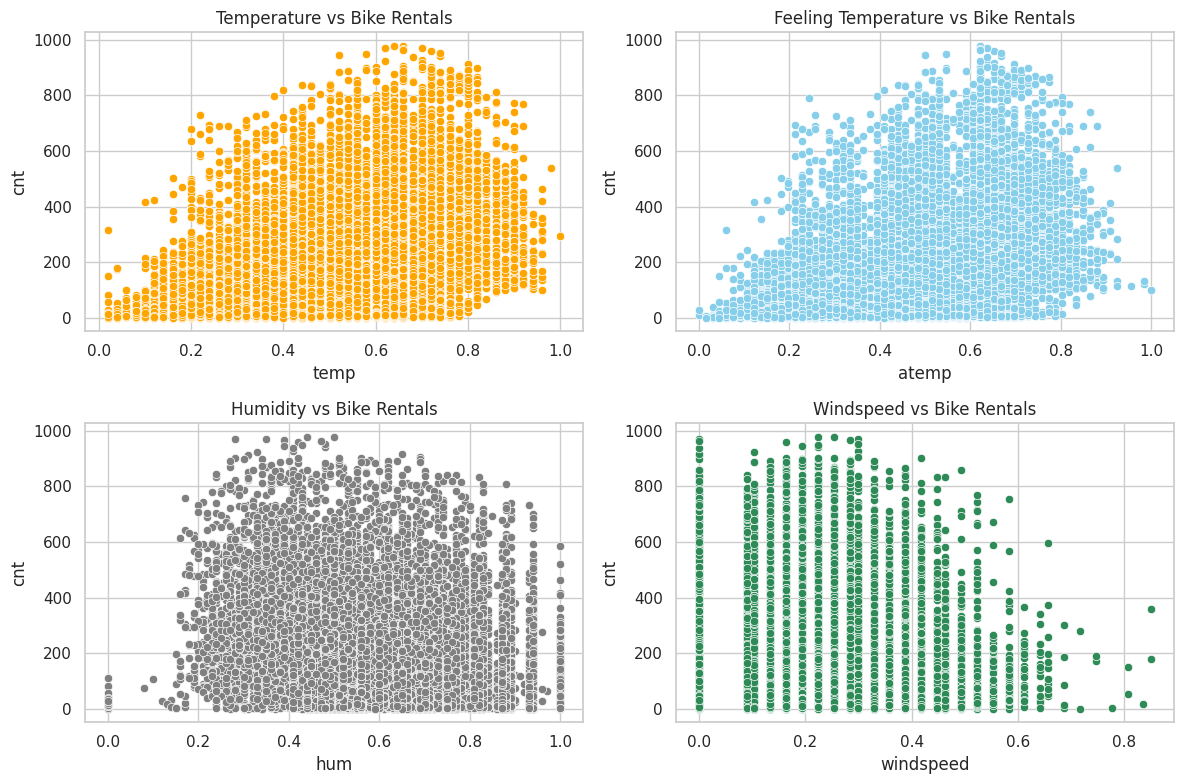

In [72]:
# prompt: plot temp, atemp, hum, windspeed vs cnt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot temp vs cnt
sns.scatterplot(x='temp', y='cnt', data=df, ax=axes[0, 0], color='orange')
axes[0, 0].set_title('Temperature vs Bike Rentals')

# Plot atemp vs cnt
sns.scatterplot(x='atemp', y='cnt', data=df, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Feeling Temperature vs Bike Rentals')

# Plot hum vs cnt
sns.scatterplot(x='hum', y='cnt', data=df, ax=axes[1, 0], color='grey')
axes[1, 0].set_title('Humidity vs Bike Rentals')

# Plot windspeed vs cnt
sns.scatterplot(x='windspeed', y='cnt', data=df, ax=axes[1, 1], color='seagreen')
axes[1, 1].set_title('Windspeed vs Bike Rentals')

# Adjust layout
plt.tight_layout()
plt.show()


### Pertanyaan 4: Predicted Demand

In [73]:
# Define X (dependent var) and y (independent var)
X = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = df['cnt']
X = sm.add_constant(X)


In [74]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the OLS regression model on the training data
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the testing data
y_pred = model.predict(X_test)


In [75]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)

Mean Squared Error (MSE): 21928.038274581835
Root Mean Squared Error (RMSE): 148.08118811848396
Mean Absolute Error (MAE): 112.38479426729732


In [76]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     577.2
Date:                Sat, 27 Jul 2024   Prob (F-statistic):               0.00
Time:                        05:19:02   Log-Likelihood:                -89478.
No. Observations:               13903   AIC:                         1.790e+05
Df Residuals:                   13891   BIC:                         1.791e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.5880      7.982     10.347      0.0

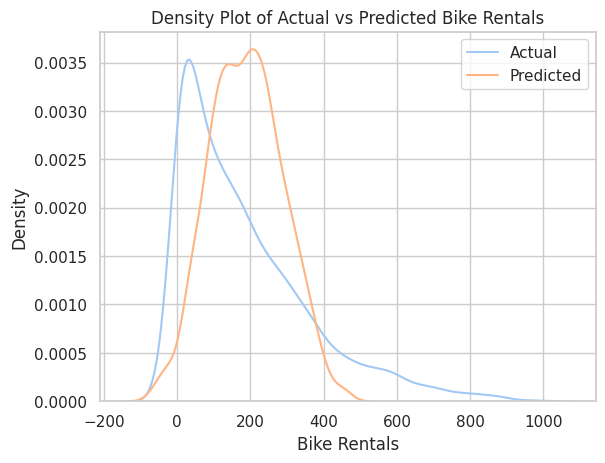

In [77]:
# Plot the distribution of actual vs predicted values
sns.kdeplot(y_test, label='Actual', fill=False)
sns.kdeplot(y_pred, label='Predicted', fill=False)
plt.xlabel('Bike Rentals')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs Predicted Bike Rentals')
plt.legend()
plt.show()


## Conclusion

- Waktu favorit pelanggan bersepeda adalah saat hari kerja di sore hari. Banyak orang bersepeda di hari kamis, jumat, dan sabtu. sementara pada hari minggu tidak seramai hari lain.

- Perbedaan yang signifikan antara registered user dan casual user adalah hari favorit. Registered user cenderung bersepeda saat hari kerja dan casual user cenderung bersepeda saat hari libur. Sehingga saat weekend sabtu dan minggu jumlah registered user menurun dan casual user meningkat.

- User meningkat seiring meningkatnya temperatur, artinya pelanggan suka bersepeda di saat cuaca panas tetapi saat temperatur terlalu tinggi jumlah pelanggan juga akan menurun. Puncak angka pelanggan yaitu di temperatur 24-26°C. Pelanggan kurang suka bersepeda saat angin kencang. Kecepatan angin berbanding terbalik dengan angka pelanggan, sehingga semakin tinggi kecepatan angin semakin rendah angka pelanggan, dan sebaliknya.

- Model regresi berhasil dibuat dengan OLS dengan R-squared 0.314, Adj. R-squared: 0.313 dan mendapatkan skor evaluation matrix:

      * Mean Squared Error (MSE): 21928.038274581835
      * Root Mean Squared Error (RMSE): 148.08118811848396
      * Mean Absolute Error (MAE): 112.384794267297322
Persamaan Regresi yang didapat:

  cnt = 82.5880 + 18.581 (season) + 79.0259 (year) + 1.0013 (month) - 25.0661 (holiday) + 1.4791 (weekday) + 3.4873 (workingday) + 6.5343 (weathersit) + 72.4434 (temp) + 276.4929 (atemp) - 285.6758 (hum) + 58.7544 (windspeed)